<div id="container" style="position:relative;">
<div style="float:left"><h1> Image Analysis </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Images and computer vision are one the current fields of intense focus for many applications from facial recognition to medicine. In this notebook, we will cover some basics of image analysis such as image formats, normalization, and applying supervised and unsupervised machine learning techniques to image data. This is a fast-moving field, and is now dominated by deep learning - we will talk about these approaches later in the course.

### Image Formats

Images can be are stored in range of formats - jpg, bmp, or png to name a few. Simply put, each of these formats is just a different way of storing the intensity at each pixel. 

The majority of images are either grayscale or RGB encoded. Grayscale images are represented by a pixel intensity at each point, ranging from 0 (black) to 255 (white), and RGB images are encoded from 0-255 on three channels of Red, Green, and Blue. 

The pixels are stored in NumPy arrays, where the dimensions of an array are the of the number of pixels for the image width and height, and in the case of color images, a third dimension for each of the color channels:

In [2]:
from scipy.misc import face

grayscale_raccoon = face(gray=True)
color_raccoon = face()

The shape of the grayscale raccoon image is: (768, 1024)


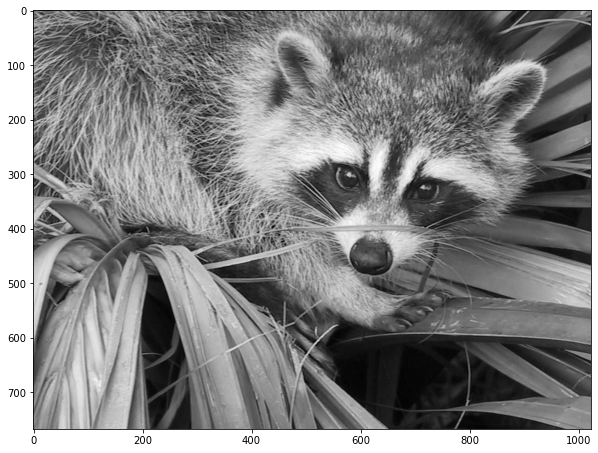

In [3]:
print(f'The shape of the grayscale raccoon image is: {grayscale_raccoon.shape}')
plt.figure(figsize=(10,10))
plt.imshow(grayscale_raccoon, cmap='gray');
plt.show()

The shape of the color raccoon image is: (768, 1024, 3)


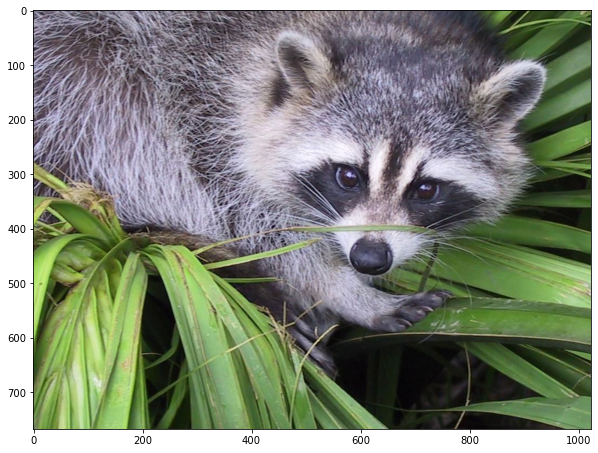

In [4]:
print(f'The shape of the color raccoon image is: {color_raccoon.shape}')
plt.figure(figsize=(10,10))
plt.imshow(color_raccoon)
plt.show()

Inspecting each of the images, we see the grayscale image is a two dimensional numpy array (height $\times$ width), and the color image is a three dimensional numpy (height $\times$ width $\times$ 3 for each RGB channel).

In [5]:
grayscale_raccoon[:3,:3]

array([[114, 130, 145],
       [ 83, 104, 123],
       [ 68,  88, 109]], dtype=uint8)

In [6]:
color_raccoon[:3,:3,:]

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126]]], dtype=uint8)

We can see immediately how easily we can access the numpy array that is underlying the image. Image pixels can also be represented in the range 0.0 - 1.0


In [7]:
grayscale_raccoon_normalized = grayscale_raccoon/grayscale_raccoon.max()
grayscale_raccoon_normalized[:3, :3]

array([[0.456, 0.52 , 0.58 ],
       [0.332, 0.416, 0.492],
       [0.272, 0.352, 0.436]])

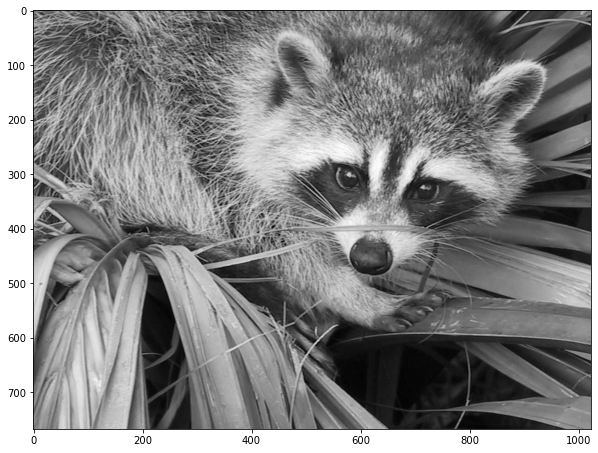

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(grayscale_raccoon_normalized, cmap='gray');
plt.show()

### Thresholding Images

Now that we know that images are interpretable as arrays, we can unleash all of our NumPy knowledge on them! 

We usually want to work with images in one of three ways:

* Preprocess the image for a machine learning model
* Employ machine learning to predict unknown properties of images (*e.g.* facial recognition)
* Extract other information from images (*e.g.* extract text from written documents)


Let's try thresholding the raccoon image for better pre-processing later. First, let's look at thresholding on the grayscale image:

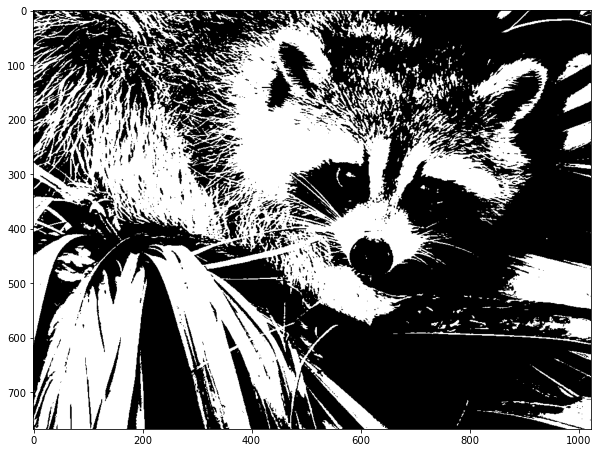

In [9]:
normalized = np.where(grayscale_raccoon <= 128, 0, 255)

plt.figure(figsize=(10,10))
plt.imshow(normalized, cmap='gray');

We can also use thresholding to try and remove certain elements. For example, let's remove the grass from the color raccoon image:

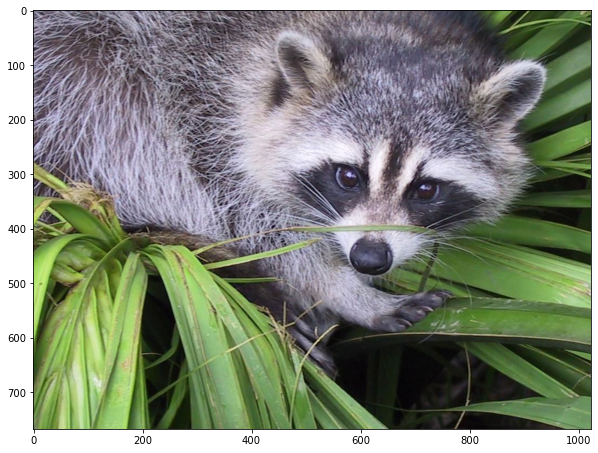

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(color_raccoon)
plt.show()

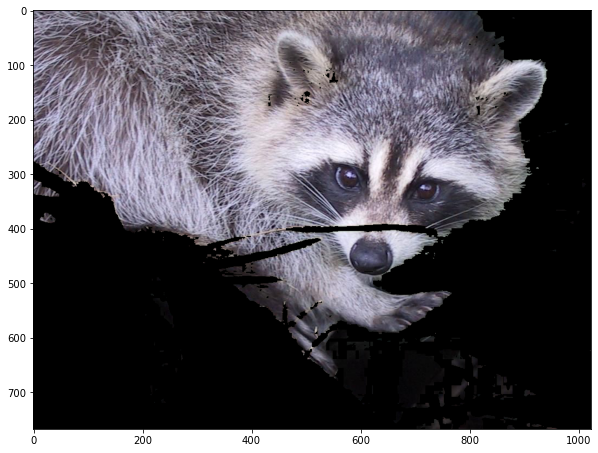

In [11]:
# Define some magic numbers
RED = 0
GREEN = 1
BLUE = 2

# We start with making a placeholder for our new image
new_color_raccoon = np.zeros_like(color_raccoon)

# Assume we have grass wherever the green is larger than blue by some factor
grass_condition = color_raccoon[:,:,GREEN] > 1.05 * color_raccoon[:,:,BLUE]

# Now copy each channel, replacing the areas where 'grass_condition' is True to 0 
for channel in [RED, GREEN, BLUE]:
    
    new_color_raccoon[:,:, channel] = np.where(grass_condition, 0, color_raccoon[:,:, channel])

plt.figure(figsize=(10,10))
plt.imshow(new_color_raccoon)
plt.show()

### Image Analysis using Machine Learning

We can also employ our machine learning techniques to do image classification. While the current state of the art is the application of deep learning, we can employ other methods with surprisingly good accuracy for many problems.

For this we will be working with the modified digit dataset taken from the National Institute of Standards and Technology (MNIST) for this. This dataset is composed of 70,000 hand written images and has become a canonical example of image classification in machine learning.

The dataset itself is a modified version of the NIST dataset which procured handwritten digits from the US Census Bureau and from US high school students. However, the data was originally set up such that the bureau digits were in the training set, and the digits written by high school students were in the test set. These two were later combined, shuffled, pre-processed to center all digits, and split again into 60,000 train images and 10,000 test images.

It has become somewhat of a contest to see who can get the best accuracy on the test set. [The current reigning accuracy is 99.77%](http://yann.lecun.com/exdb/mnist/)

In [12]:
# This will take some time, about a minute
from sklearn.datasets import fetch_openml

data_path = "data/mnist"
mnist = fetch_openml('mnist_784', data_home=data_path, as_frame=False)

In [13]:
images = mnist.data.reshape(-1, 28, 28) # the dataset comes pre-flattened, we will see what that means in a second,
                                        # but we have to reshape it to display it as images
classes = mnist.target.astype(np.int32)

In [14]:
images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Let's take a look at one of the images:

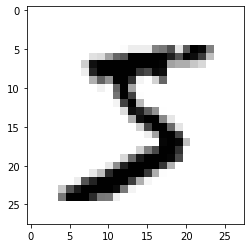

In [15]:
plt.figure()
plt.imshow(images[0], cmap="gray_r")
plt.show()

In [16]:
images[0].shape

(28, 28)

We can see each image is sized 28x28 and in monochrome (black-and-white). We can also look at a representative image from each class:

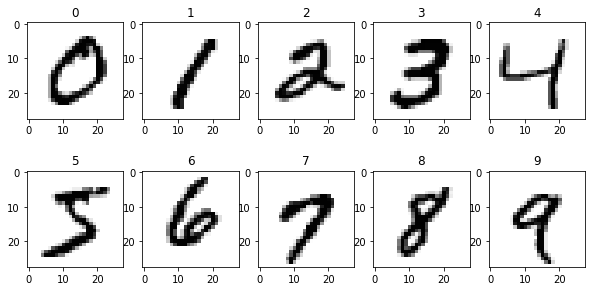

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(images[classes==target][0], cmap = 'gray_r')
    ax.set_title(target)
    
plt.show()

We can also get an idea of how varied the images are by looking at image averages. Some digits might be written similarly by many people, while others might have a lot of variation:

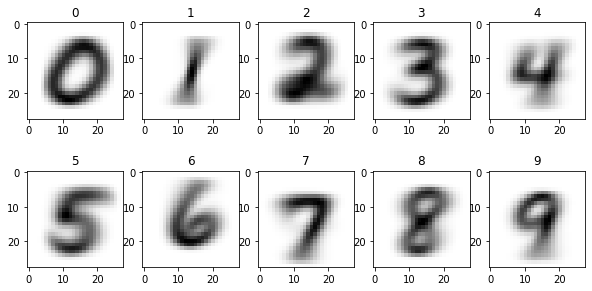

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(np.mean(images[classes==target], axis=0), cmap = 'gray_r')
    ax.set_title(target)
    
plt.show()

0 seems to be pretty uniform across the dataset, which is why it has no fuzzy areas. The digit 1, on the other hand, seems to be written as either slanted right or left, which is why only the middle section is consistent, while the tips show an almost equal distribution of being slanted right or left. You can see there are blurry areas for the digits 4, 7, and 9 as well, given how there is variation in how they are drawn: for example, some people will draw a 7 with the 'hook' on the end, whereas others do not.

There are a few ways we can employ this dataset to showcase ML techniques on image data. But first, how do we go from images to the data our ML models are used to? We cannot train a model in sklearn on 28x28 arrays...

The answer is we **flatten** the image! If we have an image which is $3\times3$ as follows:

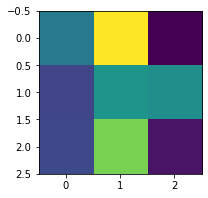

Our original image shape is: (3, 3)


In [19]:
random_image = np.random.random(9).reshape(3,3)

plt.figure(figsize=(3,3))
plt.imshow(random_image)
plt.show()

print(f'Our original image shape is: {random_image.shape}')

We can flatten it into the following $1\times9$ vector of pixels values:

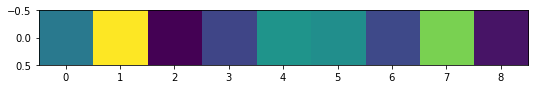

Our flat image shape is: (1, 9)


In [20]:
flat_image = random_image.reshape(1,random_image.shape[0] * random_image.shape[1])

plt.figure(figsize=(9,1))
plt.imshow(flat_image)
plt.show()

print(f'Our flat image shape is: {flat_image.shape}')

Doing the same for one of our MNIST images, we can take the following:

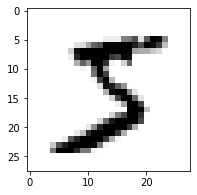

Our original image shape is: (28, 28)


In [21]:
first_image = images[0]

plt.figure(figsize=(3,3))
plt.imshow(first_image, cmap='gray_r')
plt.show()

print(f'Our original image shape is: {first_image.shape}')

And flatten it as follows:

In [22]:
flat_image = first_image.reshape(1, 28*28) # every image is 28 by 28 in this dataset

print(f'Our flat image shape is: {flat_image.shape}')

Our flat image shape is: (1, 784)


In fact, we can flatten the entire dataset:

In [23]:
print(f'Our original dataset shape is: {images.shape}')

flattened_dataset = images.reshape(images.shape[0], # Keep the same number of data points
                                   28 * 28)

print(f'Our flat dataset shape is: {flattened_dataset.shape}')

Our original dataset shape is: (70000, 28, 28)
Our flat dataset shape is: (70000, 784)


So we now that we have a 2-D array of the 70,000 images, with 784 features, where each feature represents the intensity of a given pixel. We also have class labels for each of the handwritten digits (0, 1, 2...) which will be our target variable. Now we can proceed to apply supervised techniques as we would for any other problem. We will do this in the exercise below.

#### Exercise:

1. Run a logistic regression on the dataset below. Set the solver to `saga`, the penalty to `l1`, the C value to `10`, and maximum iterations to `20`. What is the performance of your model?
2. Use the regression coefficients to plot the importance of individual pixels, can you plot these as a $28 \times 28$ image?

In [24]:
from sklearn.model_selection import train_test_split 

X = flattened_dataset
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

----------

### Employing Clustering on Image Data

By reshpaing the data, we were able to apply supervised learning to do image classification. But what if we did not have a labelled dataset? We can also employ unsupervised learning approaches on our images to find clusters of similar images, where here 'similarity' refers to the pixel intensities for a given pixel, as these are the features for each row of our data, each row being an image. 

Let's use k-means clustering to see if we can pull out similar images in the MNIST dataset, and if these clusters will line up with the class labels. Are the similarities between how many different people draw a given digit enough to naturally group them together, or are there stronger similarities between how different individuals draw different digits? (_e.g._ are a drawing of '1' and '7' more similar for some people than two different individuals '1's?)

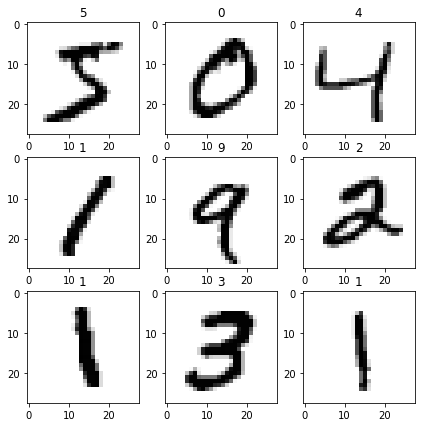

In [25]:
# Explore the images we have
images = mnist.data.reshape(-1, 28, 28) # the dataset comes pre-flattened, we will see what that means in a second,
                                        # but we have to reshape it to display it as images
classes = mnist.target.astype(np.int32)


fig, axes = plt.subplots(3, 3, figsize=(7, 7))
for target, image, ax in zip(classes, images, axes.ravel()):
    ax.imshow(image, cmap = 'gray_r')
    ax.set_title(target)

But how will K-Means work on this data? Consider two random examples of the digit 2:

In [26]:
all_twos = images[classes == 2]

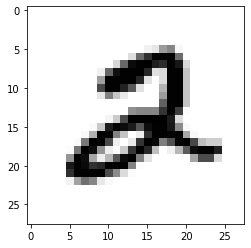

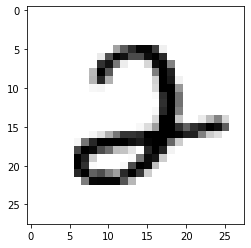

In [27]:
first_image = all_twos[0]
second_image = all_twos[1]
plt.figure()
plt.imshow(first_image, cmap="gray_r")
plt.figure()
plt.imshow(second_image, cmap="gray_r")
plt.show()

To test for the distance between data points for K-Means, recall we take the Euclidean distance between points. That is, for all of the $D$ features we take:

$$distance(\vec{b}, \vec{a}) = \sqrt{\sum_{i=0}^D (b_i - a_i)^2}$$

For tabular data this means subtracting the different features such as price, or height, or length.

However, for images, this means subtracting the pixels. To look at the distance between the two images:
* We subtract the pixel intensities of one image from the other
* Square the result
* Finally, take the square root of the sum

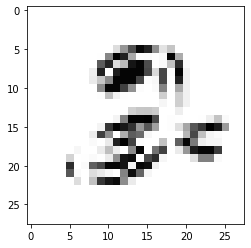

Distance is 2319.8672375806336


In [28]:
# Subtract
difference_image = first_image - second_image

# Square and visualize
squared_image = difference_image**2
plt.figure()
plt.imshow(squared_image, cmap='gray_r')
plt.show()

# Take the square root of the sum

distance = np.sqrt(np.sum(squared_image))

print(f'Distance is {distance}')

In the above image, white areas are areas where the images have identical values, while black areas are those where the two images are mostly different.

Let's sample a fraction of the dataset, and run K-Means on that resulting subsample. Here we will choose K=10, hoping that the unsupervised method will find the class labels we already know exist:

In [29]:
dataset_size = images.shape[0]
subsample_fraction = 0.5
subsample_size = int(dataset_size * subsample_fraction)

subsample_images = mnist.data[:subsample_size] # grab the first 40% of images, they should be representative

In [30]:
%%time
from sklearn.cluster import KMeans
# This would run for some time
my_km = KMeans(n_clusters=10, random_state=1)

my_labels = my_km.fit_predict(subsample_images)

CPU times: user 2min 46s, sys: 6.08 s, total: 2min 52s
Wall time: 17.4 s


The runtime is a bit of a problem... we are only working with a subset and this is still computationally intensive. We need to find a way to reduce the runtime if we want to run this algorithm for the entire dataset.

### Reducing image dimensionality

While the methodology outlined above can work, notice the majority of the squared image is white. That is, most pixels don't really have any difference because the image is centered.

From a computational standpoint, this means we are spending most of our time looking at all the pixels that are the same in all images. That is to say, most of the _variability_ in different images is actual limited to a smaller number of particular pixels which differentiate one digit from another.  We can get around this by employing PCA to reduce the dimensionality of the images.

This will greatly reduce the computation time for K-means, given that we are reducing the number of features, and therefore dimensions, to compute distances across.

#### Exercise 

1. Reduce the dimensionality of the data using PCA such that 90% of the variance remains, what is the shape of the reduced dataset?
2. Use the reduced dataset and KMeans clustering to find 10 clusters in the data. How do you expect the data to cluster?
3. Plot the means of each cluster as images, what does each cluster represent?

In [31]:
print(f'Our original dataset shape is: {images.shape}')

# Flatten the image dataset again
flattened_dataset = images.reshape(images.shape[0], # Keep the same number of data points
                                   28*28)

print(f'Our flat dataset shape is: {flattened_dataset.shape}')

Our original dataset shape is: (70000, 28, 28)
Our flat dataset shape is: (70000, 784)


----------
### Summary

- Images are n-dimensional arrays with 0-255, or 0.0 - 1.0, in each pixel.
- We can apply preprocessing techniques to normalize or threshold images to greater or lesser emphasize different areas 
- We can apply our regular supervised and unsupervised machine learning techniques on image data after it is "flattened"

### (BONUS) Optical Character Recognition

Sometimes we want to extract information from a document. For these cases, we use an Optical Character Recognition (OCR) program. A good example is the dirty documents dataset from UCI, where there are have many images of documents with creases and spills on them. [The dataset is here](https://drive.google.com/open?id=1Xigv2Ho_Vs0x_397gPRfLeecB8jMpBnU). The reference for this data is: 

*Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science*

Let's open some as examples:

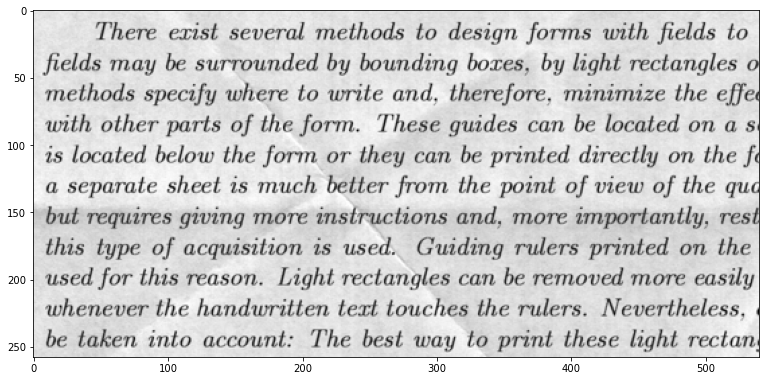

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import imageio

crease_image = imageio.imread('train/5.png')

plt.figure(figsize=(13,13))
plt.imshow(crease_image, cmap='gray')
plt.show()

Let's use [Tesseract](https://github.com/tesseract-ocr/), an Optical Character Recognition (OCR) library, to read the text in this image and convert it into a string. More specifically we will use Pytesseract which is a Python 'wrapper' library that allows us to interact with Tesseract using Python.

**Note: To use these packages, you should start Jupyter after activating the new environment we installed. Tesseract does not work when using the 'Change Kernel' feature.**

In [33]:
import pytesseract

text_string = pytesseract.image_to_string(crease_image)
print(text_string)

There exist several methods to design forms with fields to

fields may be surrounded by bounding boxes, by light rectangles o
‘methods specify where to write and, therefore, minimize the effe
with other parts of the form. These guides can be located on a s
is located below the form or they can be printed directly on the f
a separate sheet is much better from the point of view of the que
but requires giving more instructions and, more importantly, rest
this type of acquisition is used. Guiding rulers printed on the

used for this reason. Light rectangles can be removed more easily
whenever the handwritten teat touches the rulers. Nevertheless,
be taken into account: The best way to print these light rectan

 



Not bad! Let's try a more complex example

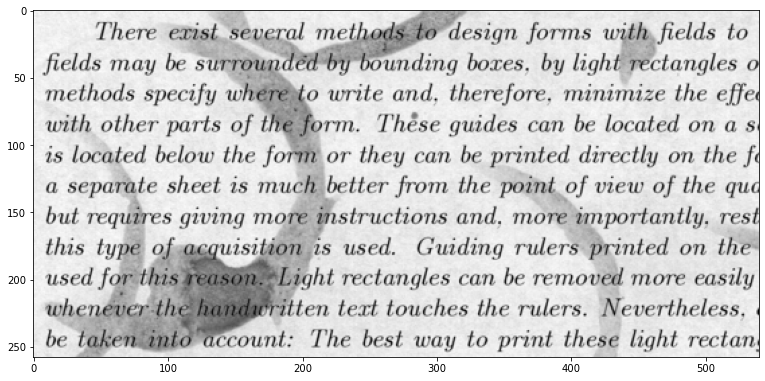

There enist several met design forms with, fields to
fields may be surmoug unding boxes, by light rectangles o

methods specify wher@o write and, therefore, minimize the effe
with other parts of rm. Thése guides can be located on a s
is located below the form or they can be printed directly on the f
a separate sheet is much better from the point of view of the qu
but requires giving mofe instructions and, more importantly, rest
is used. Guiding rulers printed on the
Light rectangles can be removed more easily
iiten text touches the rulers. Nevertheless, |
The best way to print these light rectan

  
  
  

 



In [34]:
coffee_image = imageio.imread('train/2.png')

plt.figure(figsize=(13,13))
plt.imshow(coffee_image, cmap='gray')
plt.show()

    
text_string = pytesseract.image_to_string(coffee_image)

print(text_string)

Not terrible, but some words were completely misread... Let's try and help our OCR a little with thresholding.

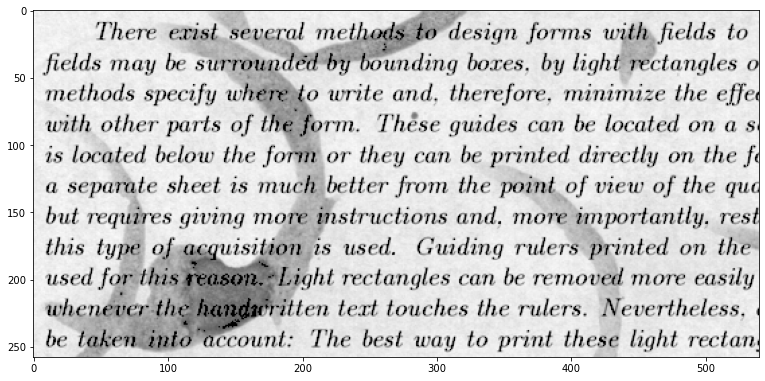

In [35]:
threshold = 90
im_thresh = np.where(coffee_image <= threshold, 0, coffee_image)
im_thresh = im_thresh.astype(np.uint8)

plt.figure(figsize=(13,13))
plt.imshow(im_thresh, cmap='gray')
plt.show()

In [36]:
text_string = pytesseract.image_to_string(im_thresh)
print(text_string)

 
  
  

There exist several meth design forms with, fields to
fields may be surrounded’ boxes, by light rectangles o
methods specify wher@\to write and, therefore, minimize the effe
with other parts of the form. Thése guides can be located on as
is located below the form or they can be printed directly on the f
a separate sheet is much better from the point of view of the quc
but requires giving more instructions and, more importantly, rest
this type ofeacquisition is used. Guiding rulers printed on the
ight rectangles can be removed more easily
itten text touches the rulers. Nevertheless,
rount: The best way to print these light rec

   

 

 
 
  
   



That's better. Let's try and help a bit more using clustering:

In [37]:
# Create a dataset of [x-coord, y-coord, pixel-value] triplets
data = []

for x in range(im_thresh.shape[1]):
    for y in range(im_thresh.shape[0]):
        data.append([x, y, im_thresh[y][x]])

In [38]:
from sklearn.preprocessing import StandardScaler

# Scale the data
data = StandardScaler().fit_transform(np.array(data))

In [39]:
from sklearn.mixture import GaussianMixture

# I'm expecting about 8 clusters, 6 coffee stains, plus text, plus background
my_gm = GaussianMixture(n_components=8, random_state=1)

predictions = my_gm.fit_predict(data)

In [40]:
# Create a new version of the image with cluster labels as pixel values
im_new = np.zeros_like(im_thresh)

counter = 0
for x in range(im_thresh.shape[1]):
    for y in range(im_thresh.shape[0]):
        im_new[y][x] = predictions[counter]
        counter += 1

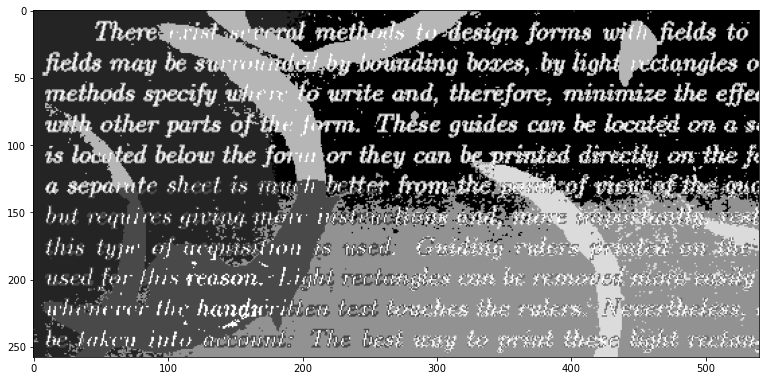

In [41]:
plt.figure(figsize=(13,13))
plt.imshow(im_new, cmap='gray')
plt.show()

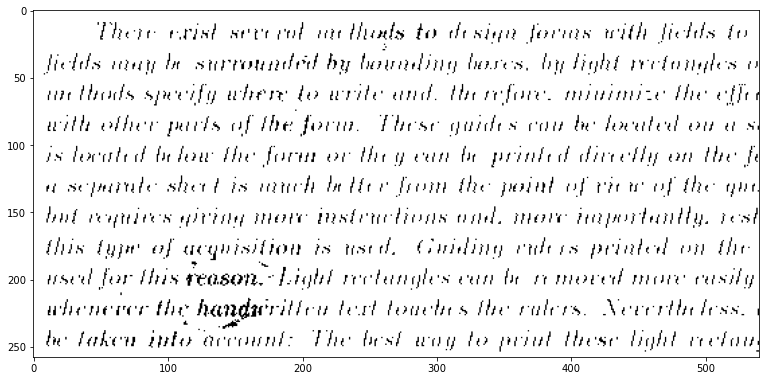

In [42]:
# If you explore the different clusters you will find cluster 7 or cluster 4 contains our text
text_cluster_image = np.where(im_new == 7, 0, 255)
#text_cluster_image = np.where(im_new == 4, 0, 255) #if the previous line doesn't work as expected, try this one

plt.figure(figsize=(13,13))
plt.imshow(text_cluster_image, cmap='gray')
plt.show()

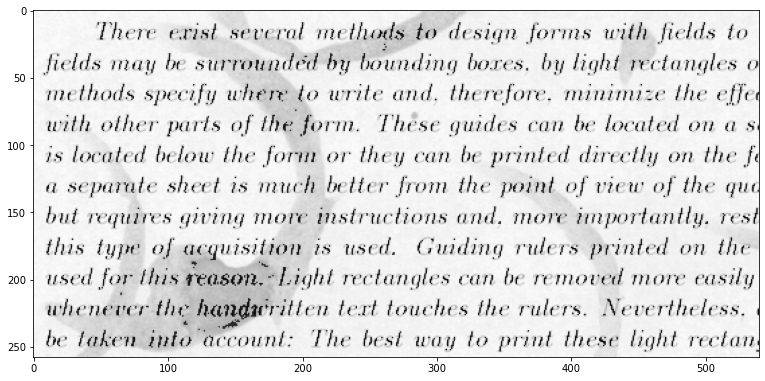

In [43]:
augmented_image = text_cluster_image + coffee_image
augmented_image = 255*augmented_image/augmented_image.max()
augmented_image = augmented_image.astype(np.uint8)

plt.figure(figsize=(13,13))
plt.imshow(augmented_image, cmap='gray')
plt.show()

In [44]:
text_string = pytesseract.image_to_string(augmented_image)
print(text_string)

There exist several methods to desiqn forms with fields to
fields may be surroundéd by bounding boxes, by light rectangles o
methods specify where to write and. therefore. minimize the effe
with other parts of the form. Thése quides can be located on a s
is located below the form or they can be printed directly on the fe
a separate sheet is much better from the point of view of the que
but requires giving more instructions and. more importantly, rest
this type of acquisition is used. Guiding rulers printed on the
used for this Feast Light rectangles can be removed more easily
whenever the handarit tc un tert touches the rulers. Nevertheless. |
be taken into“account: The best way to print these light rectan:



There might be some more automation we can employ to augment the image, but this illustrates the general idea where we can employ the many techniques we learned so far to augment our image analysis capabilities.

---
#### Exercise

1. Make a DBSCAN model to find clusters in the 2.png image. How well does it perform?
---

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>
